In [1]:
__author__ = 'stephanie'

#Demo Created and run against little bear river demo database. scripts are located at 
#https://github.com/ODM2/ODM2/tree/master/usecases/littlebearriver/sampledatabases

import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline

from odm2api.ODMconnection import dbconnection
from odm2api.ODM2.services.readService import *


# Create a connection to the ODM2 database
# ----------------------------------------

#createconnection (dbtype, servername, dbname, username, password)
session_factory = dbconnection.createConnection('mysql', 'localhost', 'ODM2', 'ODM', 'odm')#mysql
#session_factory = dbconnection.createConnection('connection type: sqlite|mysql|mssql|postgresql', '/your/path/to/db/goes/here', 2.0)#sqlite
# session_factory= dbconnection.createConnection('mssql', "(local)", "LBRODM2", "ODM", "odm")#win MSSQL
# session_factory= dbconnection.createConnection('mssql', "odm2", "", "ODM", "odm")#mac/linux MSSQL


In [3]:
_session = session_factory.getSession()

read = ReadODM2(session_factory)


In [4]:
# dir (read)

In [5]:
# Run some basic sample queries.
# ------------------------------
# Get all of the variables from the database and print their names to the console
allVars = read.getVariables()

for x in allVars:
    print x.VariableCode + ": " + x.VariableNameCV


USU3: Battery voltage
USU4: Turbidity
USU5: Turbidity
USU6: Turbidity
USU7: Turbidity
USU8: Turbidity
USU9: Turbidity
USU10: Temperature
USU13: Gage height
USU14: Temperature
USU15: Relative humidity
USU16: Precipitation
USU17: Battery voltage
USU18: Wind speed
USU19: Wind direction
USU20: Wind direction
USU21: Barometric pressure
USU22: Radiation, incoming shortwave
USU23: Battery voltage
USU24: Wind speed
USU25: Temperature
USU26: Temperature
USU27: Temperature
USU28: Relative humidity
USU29: Barometric pressure
USU30: Precipitation
USU31: Radiation, incoming shortwave
USU32: Oxygen, dissolved
USU33: Oxygen, dissolved percent of saturation
USU34: Specific conductance
USU35: pH
USU36: Temperature
USU37: Turbidity
USU39: Phosphorus, total
USU40: Phosphorus, total dissolved
USU41: Solids, total Suspended
USU44: Discharge
USU47: Solids, total suspended
USU48: Phosphorus, total
USU49: Distance
USU50: Snow Depth
USU51: Distance
USU52: Distance
USU53: Distance
USU54: Snow Depth
USU55: Snow 

In [6]:

# Get all of the people from the database
allPeople = read.getPeople()

for x in allPeople:
    print x.PersonFirstName + " " + x.PersonLastName

try:
    print "\n-------- Information about an Affiliation ---------"
    allaff = read.getAllAffiliations()
    for x in allaff:
        print x.PersonObj.PersonFirstName + ": " + str(x.OrganizationID)
except Exception as e:
    print "Unable to demo getAllAffiliations", e



Jeff Horsburgh
Nancy Mesner
Amber Spackman

-------- Information about an Affiliation ---------
Jeff: 1
Jeff: 2
Amber: 3
Nancy: 4
Amber: 6


In [7]:
# Get all of the SamplingFeatures from the database that are Sites

try:
    siteFeatures = read.getSamplingFeaturesByType('Site')
    numSites = len(siteFeatures)
    print "\n-------- Information about an SamplingFeature of type 'Site'---------"
    for x in siteFeatures:
        print x.SamplingFeatureCode + ": " + x.SamplingFeatureName
except Exception as e:
    print "Unable to demo getSamplingFeaturesByType", e


# Now get the SamplingFeature object for a SamplingFeature code
try:
    sf = read.getSamplingFeatureByCode('USU-LBR-Mendon')
    
    print "\n-------- Information about an individual SamplingFeature ---------"
    print "The following are some of the attributes of a SamplingFeature retrieved using getSamplingFeatureByCode(): \n"
    print "SamplingFeatureCode: " + sf.SamplingFeatureCode
    print "SamplingFeatureName: " + sf.SamplingFeatureName
    print "SamplingFeatureDescription: %s" % sf.SamplingFeatureDescription
    print "SamplingFeatureGeotypeCV: %s" % sf.SamplingFeatureGeotypeCV
    print "SamplingFeatureGeometry: %s" % sf.FeatureGeometry
    print "Elevation_m: %s" % str(sf.Elevation_m)
except Exception as e:
    print "Unable to demo getSamplingFeatureByCode: ", e






-------- Information about an SamplingFeature of type 'Site'---------
USU-LBR-Mendon: Little Bear River at Mendon Road near Mendon, Utah
USU-LBR-SFWeather: Little Bear River South Fork Weather Station near Avon, Utah

-------- Information about an individual SamplingFeature ---------
The following are some of the attributes of a SamplingFeature retrieved using getSamplingFeatureByCode(): 

SamplingFeatureCode: USU-LBR-Mendon
SamplingFeatureName: Little Bear River at Mendon Road near Mendon, Utah
SamplingFeatureDescription: Located below county road bridge at Mendon Road crossing
SamplingFeatureGeotypeCV: Point
SamplingFeatureGeometry:        ·±Ùü[À[ìöÛD@
Elevation_m: 1345.0


In [8]:
#add sampling feature
print "\n------------ Create Sampling Feature --------- \n",
try:
    from odm2api.ODM2.models import SamplingFeatures
    newsf = SamplingFeatures()
    session = session_factory.getSession()
    newsf.FeatureGeometry = "POINT(-111.946 41.718)"
    newsf.Elevation_m=100
    newsf.ElevationDatumCV=sf.ElevationDatumCV
    newsf.SamplingFeatureCode= "TestSF"
    newsf.SamplingFeatureDescription = "this is a test to add Feature Geomotry"
    newsf.SamplingFeatureGeotypeCV= "Point"
    newsf.SamplingFeatureTypeCV=sf.SamplingFeatureTypeCV
    newsf.SamplingFeatureUUID= sf.SamplingFeatureUUID+"2"
    session.add(newsf)
    #session.commit()
    print "new sampling feature added to database", newsf

except Exception as e :
    print "error adding a sampling feature: " + str(e)


------------ Create Sampling Feature --------- 
new sampling feature added to database error adding a sampling feature: 'str' object has no attribute 'geom_wkb'


In [9]:

# Drill down and get objects linked by foreign keys
print "\n------------ Foreign Key Example --------- \n",
try:
    # Call getResults, but return only the first result
    firstResult = read.getResults()[0]
    print "The FeatureAction object for the Result is: ", firstResult.FeatureActionObj
    print "The Action object for the Result is: ", firstResult.FeatureActionObj.ActionObj
    print ("\nThe following are some of the attributes for the Action that created the Result: \n" +
           "ActionTypeCV: " + firstResult.FeatureActionObj.ActionObj.ActionTypeCV + "\n" +
           "ActionDescription: " + firstResult.FeatureActionObj.ActionObj.ActionDescription + "\n" +
           "BeginDateTime: " + str(firstResult.FeatureActionObj.ActionObj.BeginDateTime) + "\n" +
           "EndDateTime: " + str(firstResult.FeatureActionObj.ActionObj.EndDateTime) + "\n" +
           "MethodName: " + firstResult.FeatureActionObj.ActionObj.MethodObj.MethodName + "\n" +
           "MethodDescription: " + firstResult.FeatureActionObj.ActionObj.MethodObj.MethodDescription)
except Exception as e:
    print "Unable to demo Foreign Key Example: ", e






------------ Foreign Key Example --------- 
The FeatureAction object for the Result is:  <FeatureActions('1', '1', '1', )>
The Action object for the Result is:  <Actions('1', 'Observation', '2007-09-01 00:00:00', 'Sensor deployment and 
	observation. This is a generic Observation Action created for a Time Series 
	Result loaded into ODM2	from an ODM 1.1.1 database.')>

The following are some of the attributes for the Action that created the Result: 
ActionTypeCV: Observation
ActionDescription: Sensor deployment and 
	observation. This is a generic Observation Action created for a Time Series 
	Result loaded into ODM2	from an ODM 1.1.1 database.
BeginDateTime: 2007-09-01 00:00:00
EndDateTime: 2007-09-30 23:30:00
MethodName: Battery voltage measured by Campbell Scientific CR206 datalogger.
MethodDescription: Battery voltage measured by Campbell Scientific CR206 datalogger.


In [10]:
# Now get a particular Result using a ResultID
print "\n------- Example of Retrieving Attributes of a Time Series Result -------"
try:
    tsResult = read.getTimeSeriesResultByResultId(1)
    print (
        "The following are some of the attributes for the TimeSeriesResult retrieved using getTimeSeriesResultByResultID(): \n" +
        "ResultTypeCV: " + tsResult.ResultObj.ResultTypeCV + "\n" +
        # Get the ProcessingLevel from the TimeSeriesResult's ProcessingLevel object
        "ProcessingLevel: " + tsResult.ResultObj.ProcessingLevelObj.Definition + "\n" +
        "SampledMedium: " + tsResult.ResultObj.SampledMediumCV + "\n" +
        # Get the variable information from the TimeSeriesResult's Variable object
        "Variable: " + tsResult.ResultObj.VariableObj.VariableCode + ": " + tsResult.ResultObj.VariableObj.VariableNameCV + "\n"
                                                                                                        "AggregationStatistic: " + tsResult.AggregationStatisticCV + "\n" +
        "Elevation_m: " + str(sf.Elevation_m) + "\n" +
        # Get the site information by drilling down
        "SamplingFeature: " + tsResult.ResultObj.FeatureActionObj.SamplingFeatureObj.SamplingFeatureCode + " - " +
        tsResult.ResultObj.FeatureActionObj.SamplingFeatureObj.SamplingFeatureName)
except Exception as e:
    print "Unable to demo Example of retrieving Attributes of a time Series Result: ", e


------- Example of Retrieving Attributes of a Time Series Result -------
The following are some of the attributes for the TimeSeriesResult retrieved using getTimeSeriesResultByResultID(): 
ResultTypeCV: Time series coverage
ProcessingLevel: Raw data
SampledMedium: Not applicable
Variable: USU3: Battery voltage
AggregationStatistic: Minimum
Elevation_m: 1345.0
SamplingFeature: USU-LBR-Mendon - Little Bear River at Mendon Road near Mendon, Utah



-------- Example of Retrieving Time Series Result Values ---------
<class 'odm2api.ODM2.models.TimeSeriesResultValues'> <TimeSeriesResultValues('11.71689', '2007-09-30 04:30:00', '30.0')>
   ValueID  ResultID  DataValue       ValueDateTime  ValueDateTimeUTCOffset  \
0  1947519         1   11.71689 2007-09-30 04:30:00                      -7   
1  1948350         1   11.73368 2007-09-30 02:30:00                      -7   
2  1952427         1   11.79663 2007-09-29 22:30:00                      -7   
3  1955496         1   11.83189 2007-09-29 19:00:00                      -7   
4  1957822         1   11.86547 2007-09-29 16:30:00                      -7   

   CensorCodeCV QualityCodeCV  TimeAggregationInterval  \
0  Not censored       Unknown                     30.0   
1  Not censored       Unknown                     30.0   
2  Not censored       Unknown                     30.0   
3  Not censored       Unknown                     30.0   
4  Not censored       Unknown                 

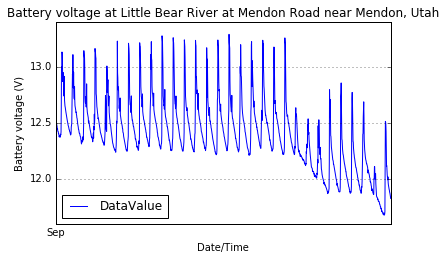

In [11]:
# Get the values for a particular TimeSeriesResult
print "\n-------- Example of Retrieving Time Series Result Values ---------"

tsValues = read.getTimeSeriesResultValuesByResultId(1)  # Return type is a pandas dataframe

# Print a few Time Series Values to the console
try:
    print tsValues.head()
except Exception as e:
    print e

# Plot the time series

try:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    tsValues.plot(x='ValueDateTime', y='DataValue', kind='line',
                  title=tsResult.ResultObj.VariableObj.VariableNameCV + " at " + tsResult.ResultObj.FeatureActionObj.SamplingFeatureObj.SamplingFeatureName,
                  ax=ax)
    ax.set_ylabel(tsResult.ResultObj.VariableObj.VariableNameCV + " (" + tsResult.ResultObj.UnitsObj.UnitsAbbreviation + ")")
    ax.set_xlabel("Date/Time")
    ax.xaxis.set_minor_locator(dates.MonthLocator())
    ax.xaxis.set_minor_formatter(dates.DateFormatter('%b'))
    ax.xaxis.set_major_locator(dates.YearLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('\n%Y'))
    ax.grid(True)
    plt.show()
except Exception as e:
    print "Unable to demo plotting of tsValues: ", e

